# 12.1  Stochastic Programs
The word stems from the Greek word **stokhastikos**, which means something like **"capable of divining"**. A stochastic program, as we shall see, is aimed at getting a good result, but the exact results are not guaranteed. 

A program is **deterministic** if whenever it is run on the same input, it produces the same output. 
```python
def squareRoot(x, epsilon): 
    """Assumes x and epsilon are of type float; x >= 0 and epsilon > 0 
       Returns float y such that x-epsilon <= y*y <= x+epsilon""" 
```
The successive approximation algorithm will always return the same value.

Suppose it had a specification something like:
```python
def rollDie(): 
    """Returns an int between 1 and 6"""
```
Almost all of the functions in random are built using the function **random.random**, which generates a _random floating point number between 0.0 and 1.0_. In point of fact, the function is not truly random. It is what mathematicians call **pseudorandom**. For almost all practical purposes outside of cryptography, this distinction is not relevant and we shall ignore it.

In [1]:
import random 
 
def rollDie(): 
    """Returns a random int between 1 and 6""" 
    return random.choice([1,2,3,4,5,6]) 
 
def rollN(n): 
    result = '' 
    for i in range(n): 
        result = result + str(rollDie()) 
    print(result)
    
rollN(10)
rollN(10)
rollN(10)

3512246245
4125113262
1455521211


 In a stochastic process two events are **independent** if the outcome of one event has no influence on the outcome of the other. 

# 12.2  Inferential Statistics and Simulation

The function flip in below simulates flipping a fair coin numFlips times, and returns the fraction of flips that came up heads. <br>For each flip, random.random() returns a random floating point number between 0.0 and 1.0.
<br>Numbers less than or greater than 0.5 are treated as heads or tails respectively.
<br>The value 0.5, is arbitrarily assigned the value tails. Given the vast number of floating point values between 0.0 and 1.0, it is highly unlikely that this will affect the result. 

In [2]:
def flip(numFlips): 
    heads = 0.0 
    for i in range(numFlips): 
        if random.random() < 0.5: 
            heads += 1 
    return heads/numFlips 
 
def flipSim(numFlipsPerTrial, numTrials): 
    fracHeads = [] 
    for i in range(numTrials): 
        fracHeads.append(flip(numFlipsPerTrial)) 
    mean = sum(fracHeads)/len(fracHeads) 
    return mean 

print(flipSim(10000000,1))
#print(flipSim(4,6))

0.4998741


Function, **flipPlot**, that produces some plots intended to show the law of large numbers at work. The line **random.seed(0)** near the bottom ensures that the pseudo-random number generator used by random.random will generate the same sequence of pseudorandom numbers each time this code is executed. This is convenient for debugging. 

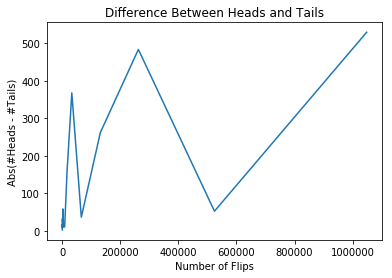

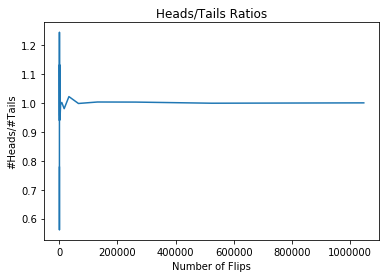

In [31]:
import pylab
def flipPlot(minExp, maxExp): 
    """Assumes minExp and maxExp positive integers; minExp < maxExp 
       Plots results of 2**minExp to 2**maxExp coin flips""" 
    ratios = [] 
    diffs = [] 
    xAxis = [] 
    for exp in range(minExp, maxExp + 1): 
        xAxis.append(2**exp) 
    for numFlips in xAxis: 
        numHeads = 0 
        for n in range(numFlips): 
            if random.random() < 0.5: 
                numHeads += 1 
        numTails = numFlips - numHeads 
        ratios.append(numHeads/float(numTails)) 
        diffs.append(abs(numHeads - numTails)) 
    pylab.title('Difference Between Heads and Tails') 
    pylab.xlabel('Number of Flips') 
    pylab.ylabel('Abs(#Heads - #Tails)') 
    pylab.plot(xAxis, diffs) 
    pylab.figure() 
    pylab.title('Heads/Tails Ratios') 
    pylab.xlabel('Number of Flips') 
    pylab.ylabel('#Heads/#Tails') 
    pylab.plot(xAxis, ratios) 
 
random.seed(0) 
flipPlot(4, 20) 

Standard deviation (độ lệch chuẩn):

$\sigma(X)=\sqrt[2]{\frac{1}{|X|}\sum_{x∈X}(x-\mu)^2}$
<br>The standard deviation, $\sigma$(sigma), of a collection of values.
<br>|X| is the size of the collection
<br>$\mu$(mu) is its mean. 

We can also instruct PyLab to use a **logarithmic scale** on either or both of the x and y axes by calling the functions **pylab.semilogx** and **pylab.semilogy**. These functions are always applied to the current figure. 

In [4]:
def stdDev(X): 
    """Assumes that X is a list of numbers. 
       Returns the standard deviation of X""" 
    mean = float(sum(X))/len(X) 
    tot = 0.0 
    for x in X: 
        tot += (x - mean)**2 
    return (tot/len(X))**0.5 #Square root of mean difference 

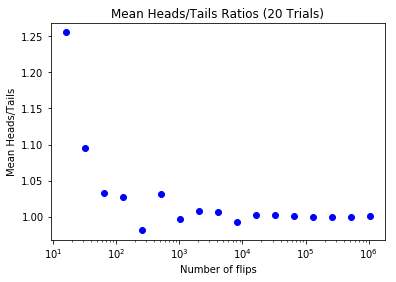

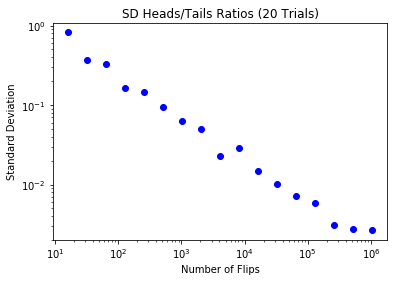

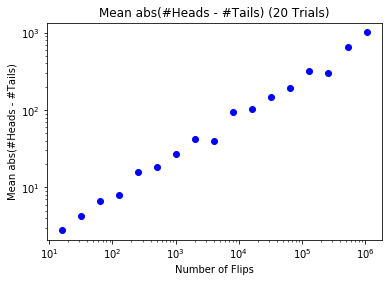

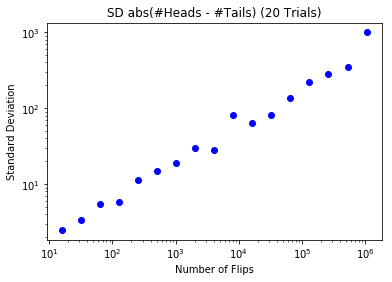

In [7]:
import pylab
def makePlot(xVals, yVals, title, xLabel, yLabel, style, logX = False, logY = False): 
    """Plots xVals vs. yVals with supplied titles and labels.""" 
    pylab.figure() 
    pylab.title(title) 
    pylab.xlabel(xLabel) 
    pylab.ylabel(yLabel) 
    pylab.plot(xVals, yVals, style) 
    if logX: 
        pylab.semilogx() 
    if logY: 
        pylab.semilogy() 
 
def runTrial(numFlips): 
    numHeads = 0 
    for n in range(numFlips): 
        if random.random() < 0.5: 
            numHeads += 1 
    numTails = numFlips - numHeads 
    return (numHeads, numTails) 
     
def flipPlot1(minExp, maxExp, numTrials): 
    """Assumes minExp and maxExp positive ints; minExp < maxExp numTrials a positive integer 
       Plots summaries of results of numTrials trials of 2**minExp to 2**maxExp coin flips""" 
    ratiosMeans, diffsMeans, ratiosSDs, diffsSDs = [], [], [], [] 
    xAxis = [] 
    for exp in range(minExp, maxExp + 1): 
        xAxis.append(2**exp) 
    for numFlips in xAxis: 
        ratios = [] 
        diffs = [] 
        for t in range(numTrials): 
            numHeads, numTails = runTrial(numFlips) 
            ratios.append(numHeads/float(numTails)) 
            diffs.append(abs(numHeads - numTails)) 
        ratiosMeans.append(sum(ratios)/float(numTrials)) 
        diffsMeans.append(sum(diffs)/float(numTrials)) 
        ratiosSDs.append(stdDev(ratios)) 
        diffsSDs.append(stdDev(diffs)) 
    numTrialsString = ' (' + str(numTrials) + ' Trials)' 
    title = 'Mean Heads/Tails Ratios' + numTrialsString 
    makePlot(xAxis, ratiosMeans, title, 'Number of flips', 'Mean Heads/Tails','bo', logX = True) 
    title = 'SD Heads/Tails Ratios' + numTrialsString 
    makePlot(xAxis, ratiosSDs, title, 'Number of Flips', 'Standard Deviation','bo', logX = True, logY = True) 
    
    title = 'Mean abs(#Heads - #Tails)' + numTrialsString 
    makePlot(xAxis, diffsMeans, title, 'Number of Flips', 'Mean abs(#Heads - #Tails)', 'bo', logX = True, logY = True) 
    title = 'SD abs(#Heads - #Tails)' + numTrialsString 
    makePlot(xAxis, diffsSDs, title, 'Number of Flips', 'Standard Deviation', 'bo', logX = True, logY = True) 
    
flipPlot1(4, 20, 20)

The **coefficient of variation** is the standard deviation divided by the mean. When comparing data sets with highly variable means (as here), the coefficient of variation is often more informative than the standard deviation.

In [12]:
def CV(X): 
    mean = float(sum(X))/(len(X)) 
    try: 
        return stdDev(X)/mean 
    except ZeroDivisionError: 
        return float('nan') 

In [13]:
CV([3,4,5])

0.2041241452319315

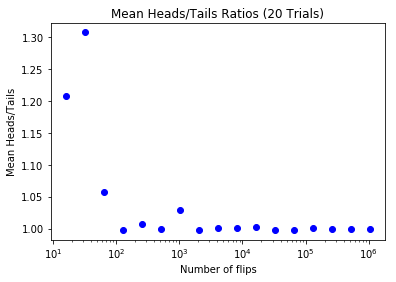

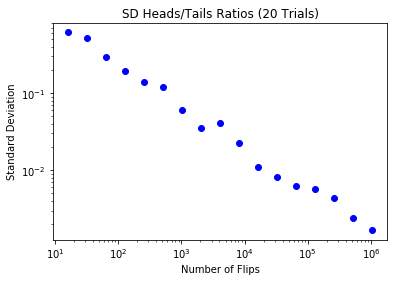

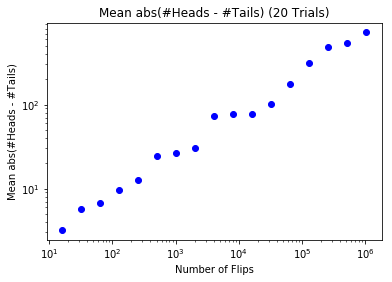

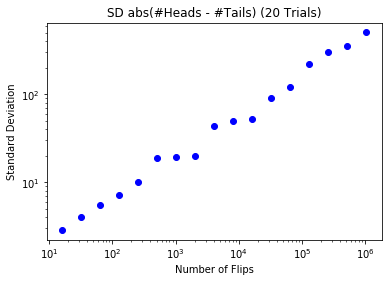

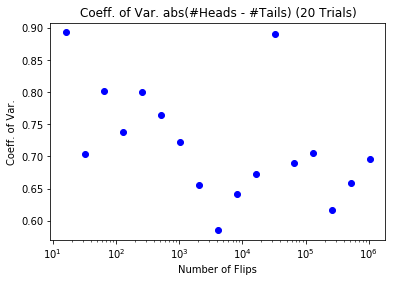

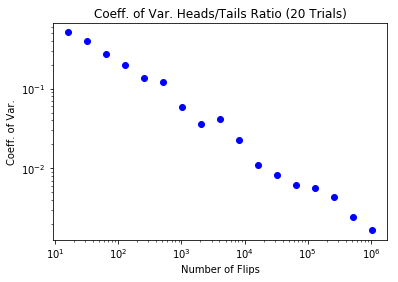

In [15]:
def flipPlot1(minExp, maxExp, numTrials): 
    """Assumes minExp and maxExp positive ints; minExp < maxExp 
         numTrials a positive integer 
       Plots summaries of results of numTrials trials of 
         2**minExp to 2**maxExp coin flips""" 
    ratiosMeans, diffsMeans, ratiosSDs, diffsSDs = [], [], [], [] 
    ratiosCVs, diffsCVs = [], [] 
    xAxis = [] 
    for exp in range(minExp, maxExp + 1): 
        xAxis.append(2**exp) 
    for numFlips in xAxis: 
        ratios = [] 
        diffs = [] 
        for t in range(numTrials): 
            numHeads, numTails = runTrial(numFlips) 
            ratios.append(numHeads/float(numTails)) 
            diffs.append(abs(numHeads - numTails)) 
        ratiosMeans.append(sum(ratios)/float(numTrials)) 
        diffsMeans.append(sum(diffs)/float(numTrials)) 
        ratiosSDs.append(stdDev(ratios)) 
        diffsSDs.append(stdDev(diffs)) 
        ratiosCVs.append(CV(ratios)) 
        diffsCVs.append(CV(diffs)) 
    numTrialsString = ' (' + str(numTrials) + ' Trials)' 
    title = 'Mean Heads/Tails Ratios' + numTrialsString 
    makePlot(xAxis, ratiosMeans, title, 
             'Number of flips', 'Mean Heads/Tails', 'bo', logX = True) 
    title = 'SD Heads/Tails Ratios' + numTrialsString 
    makePlot(xAxis, ratiosSDs, title, 
             'Number of Flips', 'Standard Deviation', 'bo', 
             logX = True, logY = True) 
    title = 'Mean abs(#Heads - #Tails)' + numTrialsString 
    makePlot(xAxis, diffsMeans, title, 
         'Number of Flips', 'Mean abs(#Heads - #Tails)', 'bo', 
         logX = True, logY = True) 
    title = 'SD abs(#Heads - #Tails)' + numTrialsString 
    makePlot(xAxis, diffsSDs, title, 
         'Number of Flips', 'Standard Deviation', 'bo', 
         logX = True, logY = True) 
    title = 'Coeff. of Var. abs(#Heads - #Tails)' + numTrialsString 
    makePlot(xAxis, diffsCVs, title, 'Number of Flips', 
             'Coeff. of Var.', 'bo', logX = True) 
    title = 'Coeff. of Var. Heads/Tails Ratio' + numTrialsString 
    makePlot(xAxis, ratiosCVs, title, 'Number of Flips', 
             'Coeff. of Var.', 'bo', logX = True, logY = True) 
    
flipPlot1(4, 20, 20)

# 12.3  Distributions
A **histogram** is a plot designed to show the distribution of values in a set of data. The values are first sorted, and then divided into a fixed number of equal width bins. A plot is then drawn that shows the number of elements in each bin.

(array([  23.,   60.,  105.,  144.,  185.,  170.,  140.,   89.,   72.,   14.]),
 array([   0.,   20.,   40.,   60.,   80.,  100.,  120.,  140.,  160.,
         180.,  200.]),
 <a list of 10 Patch objects>)

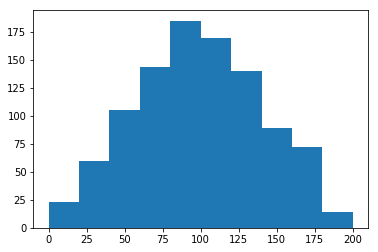

In [30]:
vals = [0, 200] #guarantee that values will range from 1 to 200 
for i in range(1000): 
    num1 = random.choice(range(1, 100)) 
    num2 = random.choice(range(1, 100)) 
    vals.append(num1+num2) 
#print(vals)
pylab.hist(vals, bins = 10) 

The simulation uses the function **pylab.xlim** to control the **extent of the x-axis**. The function call pylab.xlim() returns a tuple composed of the minimal and maximal values of the x-axis of the current figure. The function call pylab.xlim(xmin, xmax) sets the minimal and maximal values of the x-axis of the current figure. The function pylab.ylim works the same way. 

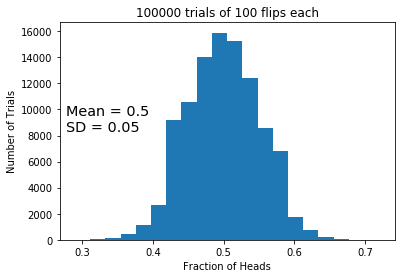

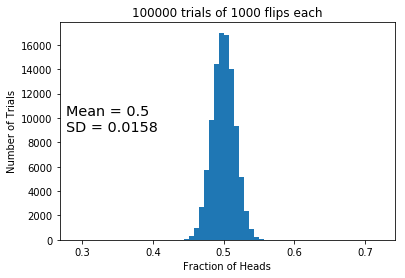

In [32]:
def flip(numFlips): 
    heads = 0.0 
    for i in range(numFlips): 
        if random.random() < 0.5: 
            heads += 1 
    return heads/numFlips 
 
def flipSim(numFlipsPerTrial, numTrials): 
    fracHeads = [] 
    for i in range(numTrials): 
        fracHeads.append(flip(numFlipsPerTrial)) 
    mean = sum(fracHeads)/len(fracHeads) 
    sd = stdDev(fracHeads) 
    return (fracHeads, mean, sd) 
 
def labelPlot(numFlips, numTrials, mean, sd): 
    pylab.title(str(numTrials) + ' trials of ' 
                + str(numFlips) + ' flips each') 
    pylab.xlabel('Fraction of Heads') 
    pylab.ylabel('Number of Trials') 
    xmin, xmax = pylab.xlim() 
    ymin, ymax = pylab.ylim() 
    pylab.text(xmin + (xmax-xmin)*0.02, (ymax-ymin)/2, 
               'Mean = ' + str(round(mean, 4)) 
               + '\nSD = ' + str(round(sd, 4)), size='x-large') 
 
def makePlots(numFlips1, numFlips2, numTrials): 
    val1, mean1, sd1 = flipSim(numFlips1, numTrials) 
    pylab.hist(val1, bins = 20) 
    xmin,xmax = pylab.xlim() 
    ymin,ymax = pylab.ylim() 
    labelPlot(numFlips1, numTrials, mean1, sd1) 
    pylab.figure() 
    val2, mean2, sd2 = flipSim(numFlips2, numTrials) 
    pylab.hist(val2, bins = 20) 
    pylab.xlim(xmin, xmax) 
    labelPlot(numFlips2, numTrials, mean2, sd2) 
 
random.seed(0) 
makePlots(100,1000,100000) 